In [29]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from dmba import classificationSummary, gainsChart, liftChart
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dmba import classificationSummary, regressionSummary
from sklearn.tree import export_graphviz 
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary

In [30]:
gc = pd.read_csv('Germancredit.csv')

In [31]:
gc.head()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,0


In [32]:
gc.shape

(1000, 32)

In [33]:
gc.columns

Index(['OBS#', 'CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR',
       'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'AMOUNT',
       'SAV_ACCT', 'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE',
       'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
       'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT',
       'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE',
       'FOREIGN', 'RESPONSE'],
      dtype='object')

In [34]:
##Review the predict variables and guess what their role in a credit decision might be. Are there any surprises in the data?
#There are no surprises in the data after reviewing it

In [35]:
gc.iloc[0]

OBS#                   1
CHK_ACCT               0
DURATION               6
HISTORY                4
NEW_CAR                0
USED_CAR               0
FURNITURE              0
RADIO/TV               1
EDUCATION              0
RETRAINING             0
AMOUNT              1169
SAV_ACCT               4
EMPLOYMENT             4
INSTALL_RATE           4
MALE_DIV               0
MALE_SINGLE            1
MALE_MAR_or_WID        0
CO-APPLICANT           0
GUARANTOR              0
PRESENT_RESIDENT       4
REAL_ESTATE            1
PROP_UNKN_NONE         0
AGE                   67
OTHER_INSTALL          0
RENT                   0
OWN_RES                1
NUM_CREDITS            2
JOB                    2
NUM_DEPENDENTS         1
TELEPHONE              1
FOREIGN                0
RESPONSE               1
Name: 0, dtype: int64

In [36]:
gc.drop(['OBS#'], axis = 1, inplace = True)

In [37]:
X = gc.drop(columns = ['RESPONSE'])
y = gc['RESPONSE']

In [38]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [39]:
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred_logit = logit_reg.predict(valid_X)

[Text(267.84000000000003, 380.52, 'CHK_ACCT <= 1.5\ngini = 0.427\nsamples = 600\nvalue = [185, 415]'),
 Text(178.56, 271.8, 'DURATION <= 11.5\ngini = 0.493\nsamples = 330\nvalue = [146, 184]'),
 Text(89.28, 163.07999999999998, 'gini = 0.3\nsamples = 49\nvalue = [9, 40]'),
 Text(267.84000000000003, 163.07999999999998, 'SAV_ACCT <= 2.5\ngini = 0.5\nsamples = 281\nvalue = [137, 144]'),
 Text(178.56, 54.360000000000014, 'gini = 0.497\nsamples = 230\nvalue = [124, 106]'),
 Text(357.12, 54.360000000000014, 'gini = 0.38\nsamples = 51\nvalue = [13, 38]'),
 Text(357.12, 271.8, 'gini = 0.247\nsamples = 270\nvalue = [39, 231]')]

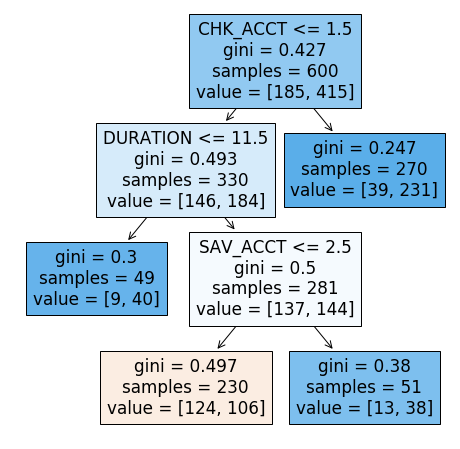

In [41]:
# fit a classification model
smallClassTree = tree.DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
smallClassTree.fit(train_X, train_y)

plt.figure(figsize = (8,8))
tree.plot_tree(smallClassTree, feature_names=train_X.columns, filled = True)

In [42]:
y_pred_tree = smallClassTree.predict(valid_X)

In [43]:
# train neural network with 2 hidden nodes
clf = MLPClassifier(hidden_layer_sizes = (1,2), activation = 'logistic', solver = 'lbfgs', random_state=1)
clf.fit(train_X, train_y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [44]:
y_pred_net = clf.predict(valid_X)

In [45]:
#The confusion matrix from the validation data
classificationSummary(valid_y, y_pred_logit)

Confusion Matrix (Accuracy 0.7550)

       Prediction
Actual   0   1
     0  53  62
     1  36 249


In [46]:
classificationSummary(valid_y, y_pred_tree)

Confusion Matrix (Accuracy 0.7175)

       Prediction
Actual   0   1
     0  75  40
     1  73 212


In [47]:
classificationSummary(valid_y, y_pred_net)

Confusion Matrix (Accuracy 0.7125)

       Prediction
Actual   0   1
     0   0 115
     1   0 285


In [48]:
###The classification tree model(2) has the highest net profit cos it has the lowest false positive value. 
##Remember, the costs of a false positive (incorrectly saying that an applicant is a good credit risk) outweighs the 
#benefits of a true positive(correctly saying that an applicant is a good credit risk) by a factor of 5

##Net profit
#Model 1: (53 * 100) + (62 * (-500)) = -25,700 
#Model 2: (75 * 100) + (40 * (-500)) = -12,500
#Model 3: (0 * 100) + (115 * (-500)) = 57,500


In [60]:
logit_reg_pred = logit_reg.predict_proba(valid_X)
full_result = pd.DataFrame({'p(1)': [p[1] for p in logit_reg_pred]})
full_result = full_result.sort_values(by=['p(1)'], ascending=False) ##we use the estimated proabilities from the logistic 
#regression (where success means 1) as a basis for selecting the best credit risks first, followed by poor-risk applicants

In [64]:
full_result

,p(1)
160,0.995514
139,0.992848
297,0.991580
249,0.990002
339,0.989254
...,...
212,0.071310
29,0.062555
107,0.049347
1,0.044069
